# Pandas: Data Analysis


__Pandas__ is a very strong library for manipulating large and complex datasets. pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python

The two primary data structures of pandas:
- *Series* is a 1D labeled homogeneously-typed array
- *DataFrame* is a general 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column

Pandas *DataFrame* structure addresses three deficiencies of NumPy arrays:

- **Strings and Numbers in one table**: *DataFrame* hold heterogenous data; each column can have its own numpy.dtype
- **Columns names & Row indices**: the axes of a data frame are labeled with column names and row indices
- **Missing values**: they account for missing values which this is not directly supported by arrays

*DataFrame* are extremely useful for data manipulation. They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.


## Import pandas

Import the *pandas* module by calling
```
import pandas as pd
```

In [17]:
import pandas as pd

The following code loads the data into pandas DataFrame and uses the function *head()* to display the first 5 rows of the table 

In [18]:
df = pd.read_csv('./data/healthexp.csv')
df.head(4)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,NaN,71.9
3,1970,Japan,150.437,72.0


The attribute *shape* provides the information about the size of the object

In [19]:
df.shape

(274, 4)

In this example we see the ability of DataFrame to hold data of different types. To get the first impression of the data, we can use the following call

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     271 non-null    float64
 3   Life_Expectancy  271 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


`df.describe()` computes various summary statistics of the DataFrame

In [21]:
df.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,271.000000,271.000000
mean,1996.992701,2797.996672,77.867159
std,14.180933,2200.958746,3.269159
min,1970.000000,134.172000,70.600000
25%,1985.250000,1040.414000,75.500000
50%,1998.000000,2287.476000,78.100000
75%,2009.000000,4060.330500,80.500000
max,2020.000000,11859.179000,84.700000


### fill nulls

count the nulls

In [22]:
df.isnull().sum()

Year               0
Country            0
Spending_USD       3
Life_Expectancy    3
dtype: int64

fill null

In [26]:
dfd = df.fillna(0)
dfd.isnull().sum(), df.isnull().sum()

(Year               0
 Country            0
 Spending_USD       0
 Life_Expectancy    0
 dtype: int64,
 Year               0
 Country            0
 Spending_USD       3
 Life_Expectancy    3
 dtype: int64)

In [28]:
df.mean()

c:\users\ruti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year               1996.992701
Spending_USD       2797.996672
Life_Expectancy      77.867159
dtype: float64

In [32]:
df.fillna(df.mean(), inplace = True)

c:\users\ruti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [33]:
df.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

## DataFrame object: accessing the data

In this section we will learn how to access the columns 

![](./images/03_subset_columns.svg)

rows of the DataFrame

![](./images/03_subset_rows.svg)

or individual elements

![](./images/03_subset_columns_rows.svg)


### filter columns
the columns in the data:

In [6]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

Each column is a Series object and we can access it in different ways

In [7]:
df.Country

0            Germany
1             France
2      Great Britain
3              Japan
4                USA
           ...      
269          Germany
270           France
271    Great Britain
272            Japan
273              USA
Name: Country, Length: 274, dtype: object

we can know the shape of a column

In [8]:
df['Country'].shape

(274,)

We can see only the unique countires included in the Series:
    

In [9]:
df['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In the same way we can access the multiple columns of the DataFrame. In this case the returned object is DataFrame

In [10]:
df_floats = df[['Spending_USD', 'Life_Expectancy']]
df_floats.head(5)

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9


### filter rows
Now let's extract the subset of the table: only the data for Japan or USA. Please, note that there are only 102 rows representing those 2 countries

In [11]:
df_japan_usa = df[df.Country.isin(['Japan', 'USA'])]
df_japan_usa = df[(df.Country == 'Japan') | (df.Country == 'USA')]
df_japan_usa.shape

(102, 4)

what do df.Country == 'Japan' returns?

In [12]:
(df.Country == 'Japan').head(10)

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
9    False
Name: Country, dtype: bool

### Filter by rows & columns
Now let's check in which country people lived longer than 83 years after the year 2015

In [13]:
df.loc[(df["Year"] > 2015) & (df["Life_Expectancy"]>=83), "Country"]

248    Japan
254    Japan
260    Japan
266    Japan
272    Japan
Name: Country, dtype: object

### filter by index

Now let's choose the rows 10 till 15 and columns 2 to 4

In [14]:
df.iloc[9:15, 2:4]

,Spending_USD,Life_Expectancy
9,357.988,71.2
10,337.364,71.0
11,185.390,73.2
12,397.097,71.2
13,384.541,71.3
14,205.778,73.4


## Read and write tabular data

write the DataFrame to excel 

In [15]:
df.to_excel("./data/healthexp.xlsx", sheet_name="data", index=False)

read the DataFrame from excel 

In [16]:
df = pd.read_excel("./data/healthexp.xlsx", sheet_name="data")

## Plots in Pandas

![](./img/04_plot_overview.svg)

By default the plotting API by Pandas plots all the numerical columns of the DataFrame. In addition to line, we can use all other possible types of the plotting

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

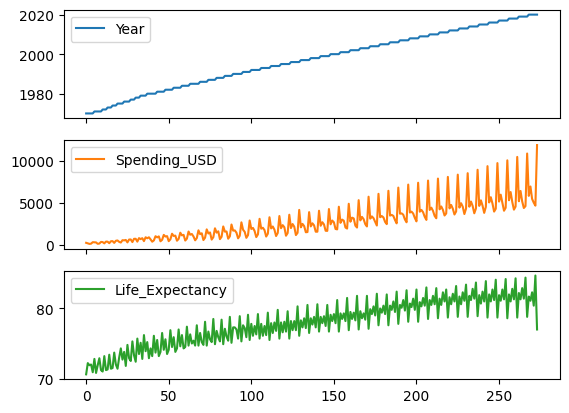

In [17]:
df.plot.line(subplots=True)

If we want to see the dependency between the Spendings and the life expectancy, we can use the scatter plot. We do it for all the countiries and only for Japan

<AxesSubplot:xlabel='Spending_USD', ylabel='Life_Expectancy'>

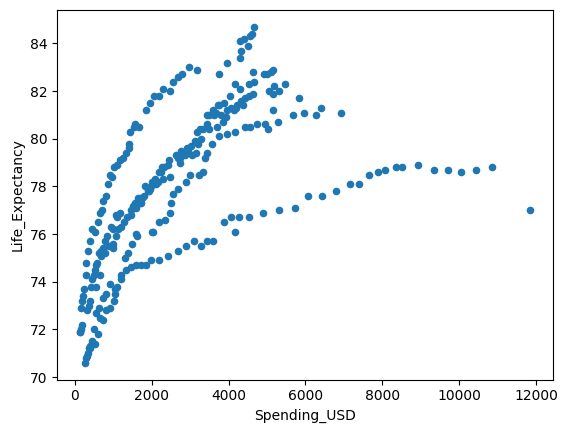

In [18]:
df.plot.scatter(x='Spending_USD', y='Life_Expectancy')

<AxesSubplot:xlabel='Spending_USD', ylabel='Life_Expectancy'>

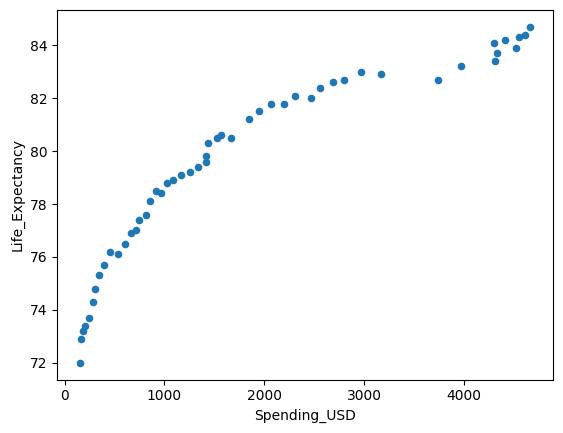

In [19]:
df[df.Country=='Japan'].plot.scatter(x='Spending_USD', y='Life_Expectancy')